编程作业

以鸢尾花数据集为例，分别实现基于线性SVM SVM、 RBF--SVM的分类模型 

(1)取前两类，实现两类别分类 

(2)多类别分类

引入相应的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

引入数据集

In [2]:
iris = datasets.load_iris()

绘制创建的点的网格

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

绘制分类器的决策边界

In [4]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## (1)取前两类，实现两类别分类

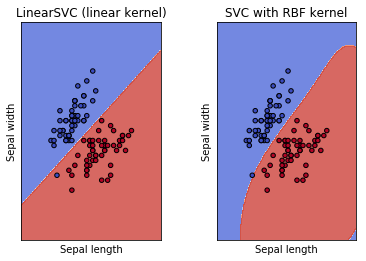

In [5]:
#两类别的分类
X = iris.data[:100, :2]
y = iris.target[:100]

# 创建SVM实例并以图展示
#分类模型的实现
C = 1.0
models = (svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
models = (clf.fit(X, y) for clf in models)

# 图的名称
titles = ('LinearSVC (linear kernel)',
          'SVC with RBF kernel')

# 设置图的数量
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#绘制图片
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## (2)多类别分类

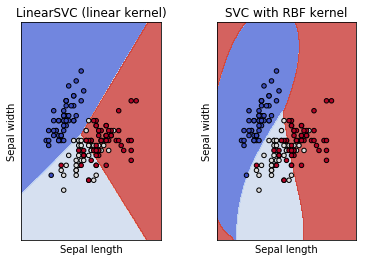

In [6]:
#多类别的分类
X = iris.data[:, :2]
y = iris.target

# 创建SVM实例并以图展示
#分类模型的实现
C = 1.0
models = (svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
models = (clf.fit(X, y) for clf in models)

# 图的名称
titles = ('LinearSVC (linear kernel)',
          'SVC with RBF kernel')

# 设置图的数量
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#绘制图片
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()